In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
raw_data = pd.read_csv("new_dataset.csv")

In [3]:
raw_data.head()

,model,age,mileage,color,price,listing_age,location,fuel,transmission
0,320i Cabrio,27,278000,Mor,715000,5,Kırıkkale,benzin,manuel
1,320i,32,337000,Kırmızı,459000,6,İstanbul,benzin,manuel
2,320i,27,239610,Kırmızı,715000,1,Çankırı,benzin,manuel
3,320i,32,150000,Mavi,365000,3,Batman,benzin,manuel
4,320i,26,270000,Füme,440000,1,Gaziantep,benzin,manuel


In [4]:
raw_data.describe()

,age,mileage,price,listing_age
count,205.000000,205.000000,2.050000e+02,205.000000
mean,20.404878,240541.400000,1.063433e+06,4.478049
std,10.921151,123091.866014,9.263790e+05,3.989663
min,0.000000,6600.000000,2.497500e+05,1.000000
25%,14.000000,150000.000000,4.450000e+05,2.000000
50%,25.000000,278000.000000,5.990000e+05,3.000000
75%,29.000000,327000.000000,1.790000e+06,6.000000
max,47.000000,599000.000000,4.700000e+06,34.000000


In [59]:
# data["fuel"] = LabelEncoder().fit_transform(data["fuel"])
# data["transmission"] = LabelEncoder().fit_transform(data["transmission"])
# data["color"] = LabelEncoder().fit_transform(data["color"])
# data["location"] = LabelEncoder().fit_transform(data["location"])

In [5]:
one_hot = pd.get_dummies(raw_data, columns=["color", "location", "model"], drop_first=True)
one_hot

,age,mileage,price,listing_age,fuel,transmission,color_Bordo,color_Füme,color_Gri,color_Gümüş Gri,...,model_320i 50th Year M Edition,model_320i Cabrio,model_320i Edition M Sport,model_320i Executive M Sport,model_320i First Edition Luxury Line,model_320i First Edition M Sport,model_320i First Edition Sport Line,model_320i M Sport,model_320i Premium,model_320i Sport Line
0,27,278000,715000,5,benzin,manuel,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,32,337000,459000,6,benzin,manuel,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,27,239610,715000,1,benzin,manuel,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,32,150000,365000,3,benzin,manuel,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,26,270000,440000,1,benzin,manuel,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,17,190000,850000,2,benzin-lpg,otomatik,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
201,26,350000,400000,4,benzin-lpg,otomatik,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,27,291000,469000,2,benzin-lpg,otomatik,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
203,14,246000,980000,2,benzin-lpg,otomatik,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [6]:
one_hot["fuel"] = LabelEncoder().fit_transform(one_hot["fuel"])
one_hot["transmission"] = LabelEncoder().fit_transform(one_hot["transmission"])

In [7]:
sorted_by_value = dict(sorted(one_hot.corr()["price"].to_dict().items(), key=lambda item: item[1]))
sorted_by_value

{'mileage': -0.809200014986263,
 'age': -0.7867075529088949,
 'fuel': -0.6002901442525654,
 'location_Ankara': -0.1706020139063204,
 'color_Gümüş Gri': -0.13967531363254107,
 'color_Lacivert': -0.10622147343112691,
 'model_320i Premium': -0.10025910836542264,
 'location_Gaziantep': -0.08748930286520804,
 'location_Çorum': -0.08429229925805762,
 'location_Osmaniye': -0.07566231534829951,
 'color_Mavi': -0.07374744086538135,
 'location_Bursa': -0.07257622714027638,
 'location_Tekirdağ': -0.07045298536783112,
 'location_Balıkesir': -0.0696474188760061,
 'location_Kayseri': -0.06776192677013641,
 'location_Karabük': -0.06723071940053103,
 'color_Siyah': -0.06602569443425037,
 'location_Eskişehir': -0.06335976751965686,
 'location_Rize': -0.06162822863122646,
 'location_Sakarya': -0.060786187465930966,
 'location_Adıyaman': -0.058976518111885416,
 'location_Konya': -0.0565446597188279,
 'location_Aydın': -0.05638242397728753,
 'color_Mor': -0.055116509806813554,
 'location_Edirne': -0.05443

In [8]:
label_encoders = {}
data = raw_data.copy()
for column in ["fuel", "transmission", "color", "location", "model"]:
    le = LabelEncoder()
    data[column] = le.fit_transform(raw_data[column])
    label_encoders[column] = le

In [9]:
data

,model,age,mileage,color,price,listing_age,location,fuel,transmission
0,2,27,278000,9,715000,5,25,0,0
1,0,32,337000,6,459000,6,41,0,0
2,0,27,239610,6,715000,1,39,0,0
3,0,32,150000,8,365000,3,9,0,0
4,0,26,270000,2,440000,1,15,0,0
...,...,...,...,...,...,...,...,...,...
200,9,17,190000,2,850000,2,20,1,1
201,0,26,350000,8,400000,4,40,1,1
202,0,27,291000,3,469000,2,21,1,1
203,9,14,246000,10,980000,2,16,1,1


In [11]:
correlation_metrics = pd.DataFrame(data.corr()["price"]).sort_values(by="price")
correlation_metrics

,price
mileage,-0.809200
age,-0.786708
fuel,-0.600290
color,-0.203316
location,0.284839
listing_age,0.374317
transmission,0.453992
model,0.582309
price,1.000000


In [12]:
x = data["price"].tolist()
x.sort()

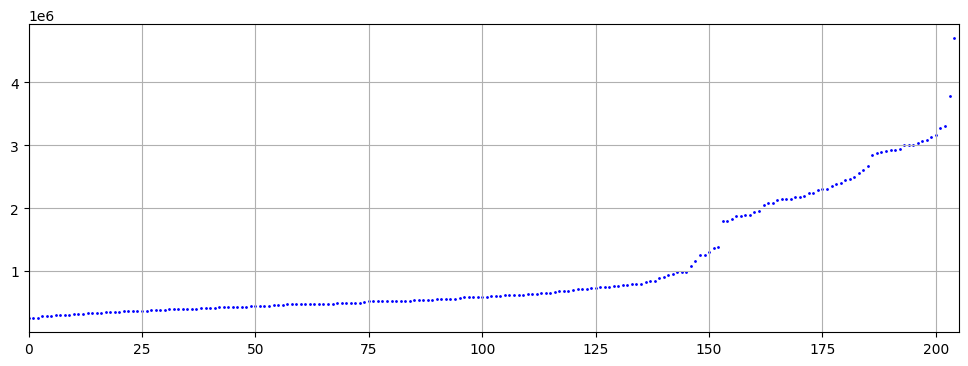

In [13]:
plt.figure(figsize=(12,4))
plt.scatter(np.arange(len(x)), x, marker="o", color="b", s=1)
plt.xlim(0, len(x))
plt.grid(True)
plt.ylabel = "Price"
# plt.xlabel 
plt.show()

<Axes: ylabel='Frequency'>

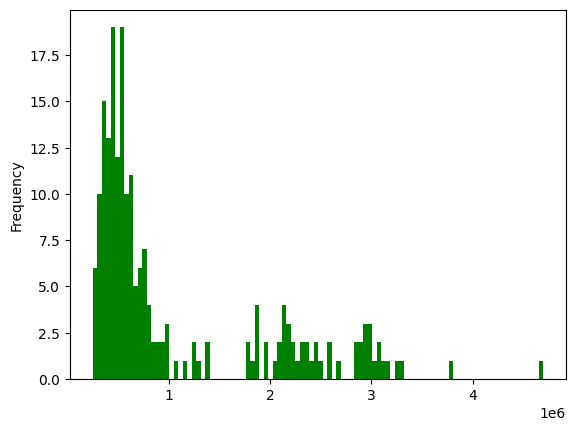

In [14]:
data.price.plot(kind="hist", bins=100, color="g")

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
x = data.drop(["price"], axis=1).values

In [18]:
y = data.price.values.reshape(-1, 1)

In [19]:
lr.fit(x, y)

LinearRegression()

In [ ]:
# lr.predict(x)

In [20]:
linear_regresssion_df = pd.DataFrame([y.flatten().tolist(), lr.predict(x).flatten().tolist()]).T

In [21]:
linear_regresssion_df.columns = ["price_real", "price_predicted"]

In [22]:
linear_regresssion_df["variation"] = abs((linear_regresssion_df["price_predicted"]-linear_regresssion_df["price_real"]) / linear_regresssion_df["price_real"] * 100)

In [23]:
linear_regresssion_df

,price_real,price_predicted,variation
0,715000.0,8.904337e+05,24.536176
1,459000.0,6.251738e+05,36.203447
2,715000.0,9.330856e+05,30.501484
3,365000.0,9.521443e+05,160.861451
4,440000.0,8.612882e+05,95.747327
...,...,...,...
200,850000.0,1.173912e+06,38.107336
201,400000.0,4.400831e+05,10.020780
202,469000.0,4.977522e+05,6.130539
203,980000.0,1.082002e+06,10.408392


In [24]:
# Average deviation
linear_regresssion_df.variation.mean()

34.07284667389262

In [36]:
individual_test_data = {
    "model": "320i",
    "fuel": "benzin",
    "transmission": "otomatik",
    "color": "Beyaz",
    "location": "İstanbul",
    "age": 2,
    "mileage": 14500,
    "listing_age": 7
}
individual_test_data = pd.DataFrame([individual_test_data])

In [37]:
for column in ["fuel", "transmission", "color", "location", "model"]:
    individual_test_data[column] = label_encoders[column].transform(individual_test_data[column])

In [32]:
individual_test_data= individual_test_data.values.reshape(-1, individual_test_data.shape[1])

In [ ]:
lr.predict(individual_test_data)[0,0]